In [61]:
# Import para visualizar as pastas
import os
import sys

# Adiciona a pasta raiz do projeto ao path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
from pathlib import Path

In [3]:
# import das bibliotecas utilizadas para exploração do dataframe
from src.data.load_data import load_csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = load_csv()
display(df)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [7]:
print(df.shape)

(121273, 2)


In [8]:
print(df.describe())

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000


In [9]:
print(df.isna().sum())

Datetime    0
AEP_MW      0
dtype: int64


In [10]:
print(df.dtypes)

Datetime     object
AEP_MW      float64
dtype: object


In [11]:
df_datetime = df.copy()
df_datetime['Datetime'] = pd.to_datetime(df_datetime['Datetime'])

In [12]:
display(df_datetime)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [13]:
print(df_datetime.dtypes)

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object


In [14]:
df_aep_mw = df['AEP_MW']

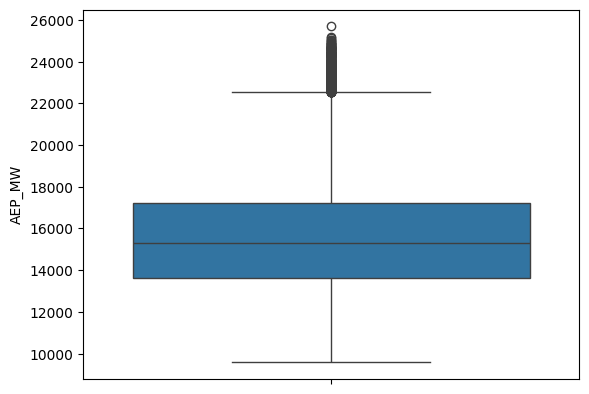

In [15]:
ax = sns.boxplot(data=df_aep_mw)
plt.tight_layout
plt.show()

In [65]:
df_date = df_datetime.sort_values("Datetime")

In [66]:
display(df_date)

,Datetime,AEP_MW
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0
...,...,...
116157,2018-08-02 20:00:00,17673.0
116158,2018-08-02 21:00:00,17303.0
116159,2018-08-02 22:00:00,17001.0
116160,2018-08-02 23:00:00,15964.0


# Salvando Novo DF

Salvando novo dataframe no caminha `data/processed`

In [72]:
# Salvar o DataFrame completo ajustado
data_path = Path("../data/processed")  # ".." sobe um nível para o root do projeto
# Garantir que a pasta processed exista
os.makedirs(data_path, exist_ok=True)
df_date.to_csv(data_path/"AEP_hourly_update.csv", index=False)

# 2004

In [74]:
start_date_2004 = '2004-10-01 01:00:00'
end_date_2004 = '2004-12-31 23:00:00'
df_2004 = df_date[(df_date['Datetime'] >= start_date_2004) & (df_date['Datetime'] 
                    <= end_date_2004)].copy()

# Salvar o DataFrame completo ajustado
data_path = Path("../data/processed")  # ".." sobe um nível para o root do projeto
# Garantir que a pasta processed exista
os.makedirs(data_path, exist_ok=True)
df_2004.to_csv(data_path/"AEP_2004.csv", index=False)

In [40]:
display(df_2004)
print(df_2004.shape)

,Datetime,AEP_MW
2183,2004-10-01 01:00:00,12379.0
2184,2004-10-01 02:00:00,11935.0
2185,2004-10-01 03:00:00,11692.0
2186,2004-10-01 04:00:00,11597.0
2187,2004-10-01 05:00:00,11681.0
...,...,...
18,2004-12-31 19:00:00,15261.0
19,2004-12-31 20:00:00,14774.0
20,2004-12-31 21:00:00,14363.0
21,2004-12-31 22:00:00,14045.0


(2206, 2)


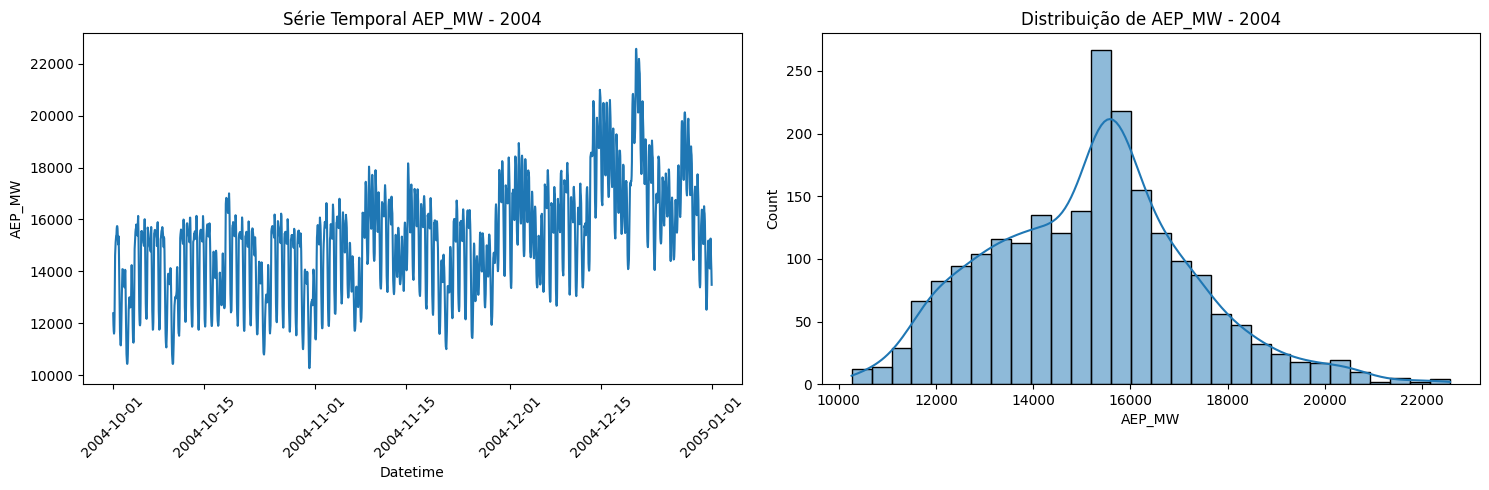

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Série temporal
sns.lineplot(data=df_2004, x='Datetime', y='AEP_MW', ax=ax1)
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Série Temporal AEP_MW - 2004')

# Histograma com KDE
sns.histplot(data=df_2004, x='AEP_MW', kde=True, ax=ax2)
ax2.set_title('Distribuição de AEP_MW - 2004')

plt.tight_layout()

# Slavar na pasta reports/figures
# Garantir que a pasta existe
figures_path = Path("../reports/figures")  # ".." sobe um nível para o root do projeto
figures_path.mkdir(parents=True, exist_ok=True)  # garante que exista
fig.savefig(figures_path/"eda_2004.png", dpi=300)

plt.show()

# 2005

In [75]:
start_date_2005 = '2005-01-01 00:00:00'
end_date_2005 = '2005-12-31 23:00:00'
df_2005 = df_date[(df_date['Datetime'] >= start_date_2005) & (df_date['Datetime'] 
                    <= end_date_2005)].copy()

# Salvar o DataFrame completo ajustado
data_path = Path("../data/processed")  # ".." sobe um nível para o root do projeto
# Garantir que a pasta processed exista
os.makedirs(data_path, exist_ok=True)
df_2005.to_csv(data_path/"AEP_2005.csv", index=False)

In [44]:
display(df_2005)
print(df_2005.shape)

,Datetime,AEP_MW
23,2005-01-01 00:00:00,12892.0
10941,2005-01-01 01:00:00,12316.0
10942,2005-01-01 02:00:00,11890.0
10943,2005-01-01 03:00:00,11579.0
10944,2005-01-01 04:00:00,11461.0
...,...,...
2225,2005-12-31 19:00:00,16462.0
2226,2005-12-31 20:00:00,16024.0
2227,2005-12-31 21:00:00,15722.0
2228,2005-12-31 22:00:00,15264.0


(8758, 2)


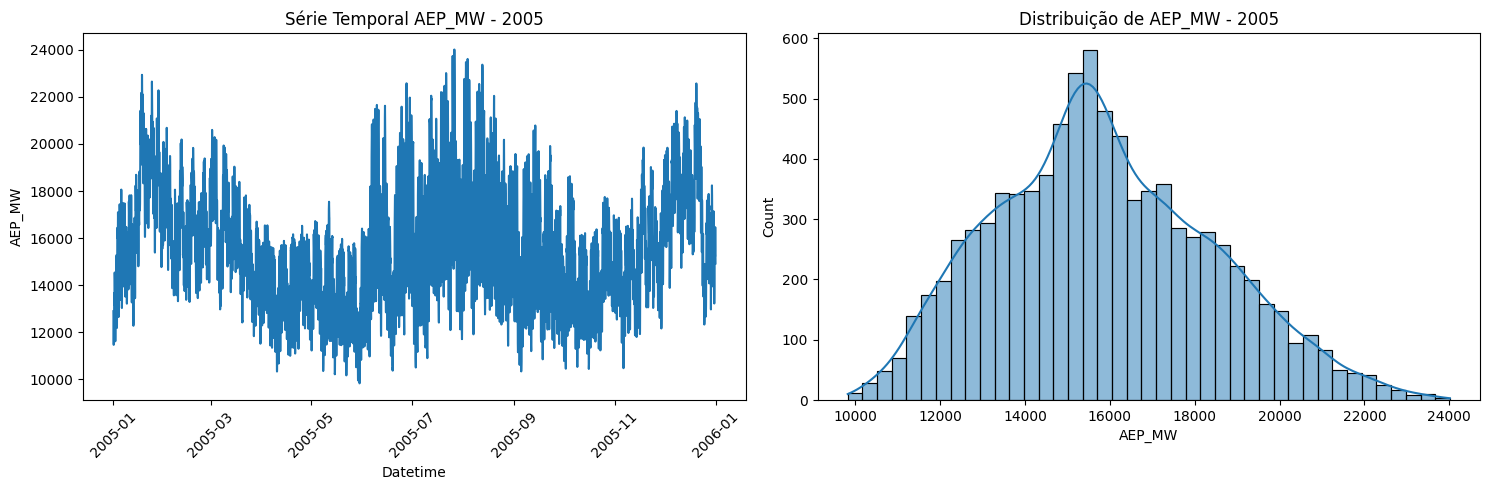

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Série temporal
sns.lineplot(data=df_2005, x='Datetime', y='AEP_MW', ax=ax1)
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Série Temporal AEP_MW - 2005')

# Histograma com KDE
sns.histplot(data=df_2005, x='AEP_MW', kde=True, ax=ax2)
ax2.set_title('Distribuição de AEP_MW - 2005')

plt.tight_layout()

# Slavar na pasta reports/figures
# Garantir que a pasta existe
figures_path = Path("../reports/figures")  # ".." sobe um nível para o root do projeto
figures_path.mkdir(parents=True, exist_ok=True)  # garante que exista
fig.savefig(figures_path/"eda_2005.png", dpi=300)

plt.show()

# 2006